<h1 align='center'> Análise Vibracional de um Modelo Quarter Car </h1>

In [1]:
#Importando bibliotecas:
import numpy as np
from sympy import *
from sympy.integrals.heurisch import heurisch
import warnings
import matplotlib.pyplot as plt

#Cores dos gráficos:
color = ['red', 'green', 'blue', 'cyan', 'orange', 'm', 'yellow', 'purple', 'black', 'pink']

#Exibição dos gráficos em no notebook:
%matplotlib inline

'''
#Exibição dos gráficos em janela externa:
%matplotlib qt
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['font.size'] = 20
'''

# Inicializações importantes:
warnings.filterwarnings("ignore")
init_printing()

# Função de arredondar elemento da matriz:
def arredNUM(matrix):
    for a in preorder_traversal(matrix):
        if isinstance(a, Float):
            matrix = matrix.subs(a, round(a, 4))
    return matrix

<div align="center">
    <img src="images/qcmodel.png">
</div>

<h5 align='right'> (Jazar, 2017) - 3rd ed </h5>

$$[M]\ddot{x} - [C]\dot{x} + [K]x = [F]$$

<h5 align='right'> Jazar - Eq. (11.46) </h5>

### Parâmetros do sistema:

In [2]:
# Unidades no S.I [Kg, N/m, (N*s)/m]:
# GDL não suspenso:
mu = 75
ku = 193000

# GDL suspenso:
ms = 375
ks = 35000
cs = 1800

### Excitação externa por perfil de pista:

##### Entrada Harmônica:

In [3]:



#Tempo de amostragem:
ts = 1e-2 

#Tempo de simulação:
tf = 50

# Velocidade do carro em Km/h:
v_car = 18 

# Amplitude em mm:
amplitude = 250

# Espaçamento em m:
esp = 100

# Offset em mm:
offset = 0

# Função de entrada de deslocamento, em mm:
x = Symbol('x')
freq = round(((v_car*2*np.pi)/(3.6*esp)), 4)
print(freq)
G = Symbol('\omega') # Algum bug na heurística impede a resolução com qualquer valor de frequência (será substituído mais adiante no código)
entrada = (((amplitude*sin(x*G))+offset)*1e-3)

#Criação do vetor de tempo:
tfa = 500
if(tf > tfa):
    tfa = tf
time = np.arange(0, tfa, ts)

y = lambdify(x, entrada.subs(G, freq), 'numpy')(time) #visualização do perfil

entrada

0.3142


##### Dados empíricos:

In [4]:


'''
# Leitura do arquivo:
ts = 1e-2
arq = open('data.txt', 'r')
g = []
for linha in arq:
    linha = arq.readline()
    if(linha != ''):
        g.append(float(linha))
arq.close()
def actopos(dados):
    v_ant = 0
    current_t = [0]
    current_pos = [0]
    for i in range(len(dados)):
        current_pos.append(round((current_pos[i]+(v_ant*ts)+(dados[i]*(ts**2))), 4))
        current_t.append(ts*(i+1))
    return current_t, current_pos
time, y = actopos(np.multiply(g, (9.8067*1e3)))
tf = np.max(time)
'''

#INCOMLPETO! - Tem que encontrar uma forma de ajustar uma função que atenda sinais senoidais, como soma de senos e cossenos a partir de uma amostra....



"\n# Leitura do arquivo:\nts = 1e-2\narq = open('data.txt', 'r')\ng = []\nfor linha in arq:\n    linha = arq.readline()\n    if(linha != ''):\n        g.append(float(linha))\narq.close()\ndef actopos(dados):\n    v_ant = 0\n    current_t = [0]\n    current_pos = [0]\n    for i in range(len(dados)):\n        current_pos.append(round((current_pos[i]+(v_ant*ts)+(dados[i]*(ts**2))), 4))\n        current_t.append(ts*(i+1))\n    return current_t, current_pos\ntime, y = actopos(np.multiply(g, (9.8067*1e3)))\ntf = np.max(time)\n"

##### Plot da superfície:

In [5]:
'''

# Plotando os gráficos:
plt.rcParams['figure.figsize'] = (12, 5)
plt.figure(-1)
plt.plot((0, tf), (0, 0), 'gray', linestyle='dashed')
plt.plot(time, (y*1e3), 'k')
plt.ylabel('$y(t)~~[mm]$')
plt.xlabel('$Tempo~~[s]$')
plt.xlim(0, tf)
plt.show()
'''

"\n\n# Plotando os gráficos:\nplt.rcParams['figure.figsize'] = (12, 5)\nplt.figure(-1)\nplt.plot((0, tf), (0, 0), 'gray', linestyle='dashed')\nplt.plot(time, (y*1e3), 'k')\nplt.ylabel('$y(t)~~[mm]$')\nplt.xlabel('$Tempo~~[s]$')\nplt.xlim(0, tf)\nplt.show()\n"

### Definição das matrizes (Lagrange) e condições iniciais:

##### Massa:

In [6]:
# Fator de correção para cálculos:
fc = 1e-3

# Matriz das massas (Kg):
M = np.array([
    [mu, 0,],
    [0, ms]
], dtype=float)*fc

# Matriz de rigidez (N/m):
K = np.array([
    [(ks+ku), -ks],
    [-ks, ks]
], dtype=float)*fc

# Matriz de amortecimento (N*s/m):
C = np.array([
    [cs, -cs],
    [-cs, cs]
], dtype=float)*fc

# Matriz de F(x) (transposta):
F = np.array([(ku*entrada), 0]).T*fc

# Matriz de posições iniciais (transposta):
X0 = np.array([0, 0], dtype=float).T

# Matriz de velocidades iniciais (transposta):
V0 = np.array([0, 0], dtype=float).T

Matrix(F)

⎡48.25⋅sin(\omega⋅x)⎤
⎢                   ⎥
⎣         0         ⎦

### $$\text{Obtenção de } [M]^{-1/2}:$$

In [7]:
MM = np.power(M, -1/2) # Inverso da raíz quadrada

MM[MM == np.inf] = 0 # Transforma os elementos infinitos em zero

Matrix(MM.round(4))

⎡3.6515    0  ⎤
⎢             ⎥
⎣  0     1.633⎦

### $$ \text{Cálculo da matriz } \tilde{[K]} = [M^{-1/2}][K][M^{-1/2}]:$$

In [8]:
K_til = MM@K@MM # Cálculo da matriz K_til

Matrix(K_til.round(4))

⎡ 3040.0    -208.6997⎤
⎢                    ⎥
⎣-208.6997   93.3333 ⎦

### $$ \text{Cálculo da matriz } \tilde{[C]} = [M^{-1/2}][C][M^{-1/2}]:$$

In [9]:
try:
    C_til = MM@C@MM # Cálculo da matriz C_til
except:
    C_til = np.zeros((len(M), len(M)))

Matrix(C_til.round(4))

⎡  24.0    -10.7331⎤
⎢                  ⎥
⎣-10.7331    4.8   ⎦

### $$\text{Obtendo os autovalores (} \lambda \text{) e autovetores normalizados (} P \text{) de }\tilde{[K]}:$$

In [10]:
lamb, P = np.linalg.eig(K_til) # Obtenção dos autovalores e autovetores normalizados

##### $$\text{Matriz de autovalores }[\lambda]:$$

In [11]:
Matrix(lamb.round(4))

⎡3054.7079⎤
⎢         ⎥
⎣ 78.6254 ⎦

##### $$\text{Matriz de autovetores normalizados }[P]:$$

In [12]:
Matrix(P.round(4))

⎡0.9975   0.0703⎤
⎢               ⎥
⎣-0.0703  0.9975⎦

### Cálculo das frequências naturais: $$[\omega_n] = \left[ \sqrt{\lambda} \right]$$

In [13]:
omega_n = np.sqrt(lamb) # Calcula a matriz de freqências naturais, em rad/s

Matrix(omega_n.round(4))

⎡55.2694⎤
⎢       ⎥
⎣8.8671 ⎦

### Mode Shapes: $$[u_i] = [M^{-1/2}][P_i]$$

In [14]:
U = (MM@P) # Modos de vibrar: cada linha é um GDL e cada coluna representa um modo de vibrar

Matrix(U.round(4))

⎡3.6424   0.2567⎤
⎢               ⎥
⎣-0.1148  1.629 ⎦

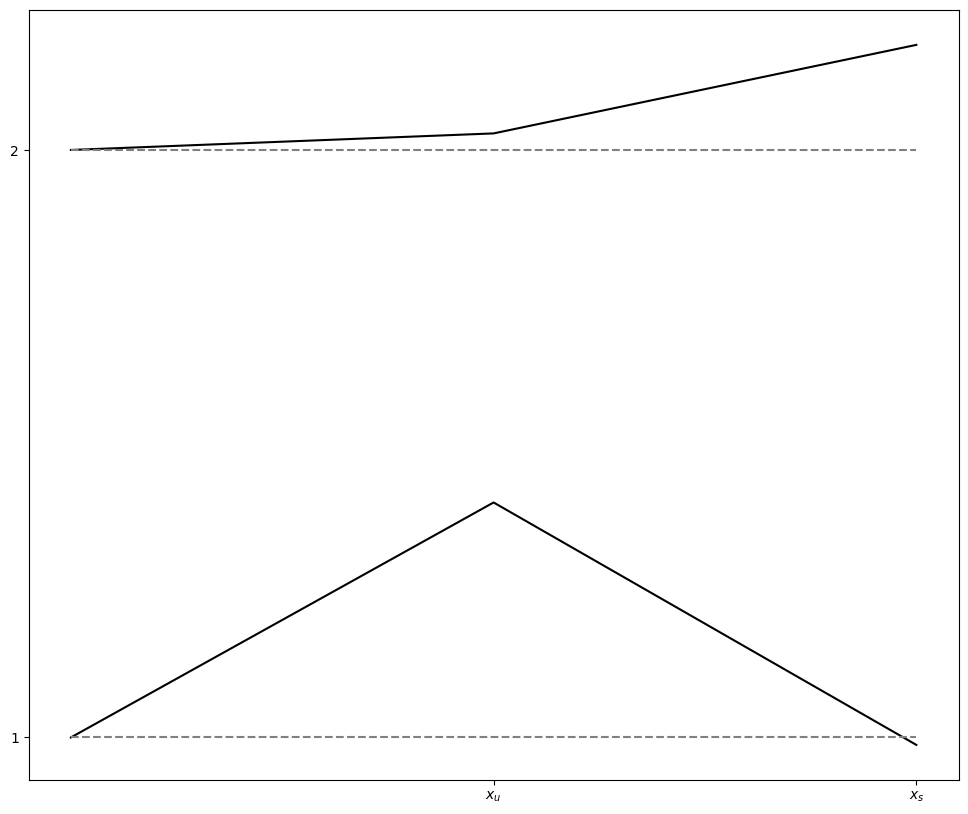

In [15]:
horizontal = False # Define o sentido de variação dos GDL's

# Plotando os gráficos:
plt.rcParams['figure.figsize'] = (12, 10)
plt.figure(0)

space = (np.max(np.abs(U))*2.5)

padding = []
for i in range(len(U)+1):
    padding.append(space*i)

vib = []
for i in range(len(U)):
    vib.append([(space*(i+1))])

for i in range(len(vib)):
    vib[i] = np.concatenate((vib[i], (vib[i][0]+U.T[i])))

if(horizontal):
    for i in range(len(U)):
        plt.plot(vib[i], padding, 'k')
        plt.plot((vib[i][0], vib[i][0]), (0, (space*len(U))), 'gray', linestyle='dashed')
    plt.xticks(padding[1:], range(1, len(U)+1))
    labels = []
    for i in range(1, len(U)+1):
        labels.append(f'$x_{i}$')
    plt.yticks(padding[1:], labels)
else:
    for i in range(len(U)):
        plt.plot(padding, vib[i], 'k')
        plt.plot((0, (space*len(U))), (vib[i][0], vib[i][0]), 'gray', linestyle='dashed')
    plt.yticks(padding[1:], range(1, len(U)+1))
    labels = ['$x_u$', '$x_s$']
    plt.xticks(padding[1:], labels)
        
plt.title('')
plt.show()

### $$\text{Cálculo da matriz } [S] = [M^{-1/2}][P]$$

In [16]:
S = MM@P # Cálcula a matriz S

Matrix(S.round(4))

⎡3.6424   0.2567⎤
⎢               ⎥
⎣-0.1148  1.629 ⎦

### $$\text{Cálculo da matriz } [\Lambda] = [P^T][\tilde{K}][P]$$

In [17]:
LAMB = P.T@K_til@P # Calcula a matriz LAMBDA, que deve ser igual à matriz diagonal contendo os autovalores

Matrix(LAMB.round(4))

⎡3054.7079     0   ⎤
⎢                  ⎥
⎣    0      78.6254⎦

### $$\text{Cálculo da matriz } [\Gamma] = [P^T][\tilde{C}][P]$$

In [18]:
GAM = P.T@C_til@P # Calcula a matriz GAMMA, que deve ser igual à matriz diagonal contendo os coeficientes de amortecimento em r -> 2*zeta*omega

Matrix(GAM.round(4))

⎡25.4104  -9.2806⎤
⎢                ⎥
⎣-9.2806  3.3896 ⎦

### $$\text{Determinando os coeficientes de amortecimento } \zeta_i:$$

In [19]:
try:
    Matrix(Z.round(4))
except:
    Z = np.zeros(len(M))
    for i in range(len(omega_n)):
        Z[i] = (GAM[i][i]/(2*np.sqrt(LAMB[i][i])))
Matrix(Z.round(4))

⎡0.2299⎤
⎢      ⎥
⎣0.1911⎦

### Cálculo das frequências amortecidas: $$[\omega_d] = \left[ \omega_n\sqrt{1-\zeta^2} \right]$$

In [20]:
omega_d = omega_n*np.sqrt(1-np.power(Z, 2)) # Calcula a matriz de freqências amortecidas, em rad/s

Matrix(omega_d.round(4))

⎡53.7893⎤
⎢       ⎥
⎣8.7036 ⎦

### $$\text{Cálculo da matriz } [\Pi] = [P^T][M^{-1/2}][F]$$

In [21]:
PI = Matrix(P.T@MM@F) # Calcula a matriz PI, que deve ser igual à matriz coluna, contendo as componentes da força aplicada, distribuida nos GDL's

Matrix(arredNUM(PI))

⎡175.7482⋅sin(\omega⋅x)⎤
⎢                      ⎥
⎣12.3857⋅sin(\omega⋅x) ⎦

### Transformações de coordenadas das condições iniciais: $$[X_0], [V_0] ~~\rightarrow~~ [R_o], [\dot{R_0}]$$

##### $$\text{Matriz de posição }[X_0] \rightarrow [R_0]:$$

In [22]:
R0 = np.linalg.inv(S)@X0 # Conversão de coordenadas para posição

Matrix(R0.round(4))

⎡0⎤
⎢ ⎥
⎣0⎦

##### $$\text{Matriz de velocidade }[V_0] \rightarrow [\dot{R_0}]:$$

In [23]:
RD0 = np.linalg.inv(S)@V0 # Conversão de coordenadas para velocidade

Matrix(RD0.round(4))

⎡0⎤
⎢ ⎥
⎣0⎦

### Obter soluções modais desacopladas do tipo: $$r_i(t) = A_ie^{-\zeta_i\omega_it}sen(\omega_{d_i}t+\phi_i)+\frac{1}{\omega_{d_i}}e^{-\zeta_i\omega_it}\int_0^t \left( f_i(\tau)e^{\zeta_i\omega_i\tau}sen(\omega_{d_i}(t-\tau)) \right)d\tau$$

### $$\text{Cálculo de } A_i = \sqrt{\frac{(r_{0_i}\omega_{d_i})^2+(\dot{r_{0_i}}+\zeta_i\omega_ir_{0_i})^2}{\omega_{d_i}^2}}:$$

In [24]:
A = np.sqrt((np.power((R0*omega_n), 2)+np.power((RD0+(Z*omega_n*R0)), 2))/np.power(omega_d, 2)) #Cálculo da matriz de amplitudes

Matrix(A.round(4))

⎡0⎤
⎢ ⎥
⎣0⎦

### $$\text{Cálculo de } \phi_i = tan^{-1}\left( \frac{r_{o_i}\omega_{d_i}}{\dot{r_0}_i+\zeta_i\omega_ir_{0_i}} \right):$$

In [25]:
ph = np.arctan((R0*omega_n)/(RD0+(Z*omega_n*R0))) # Cálculo da matriz de fases, em radianos

PHI = []

for i in range(len(ph)): #Ajuste para evitar erros de aproximação do ponto flutuante e indefinições de atan():
    if(RD0[i]+(Z[i]*omega_n[i]*R0[i])):
        if((ph[i]/np.pi) in (0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0)):
            PHI.append(nsimplify(round((ph[i]/np.pi), 4)*pi))
        else:
            PHI.append(round(ph[i], 4))
    elif(R0[i]*omega_n[i]):
        PHI.append(pi/2)
    else:
        PHI.append(0)

Matrix(PHI)

⎡0⎤
⎢ ⎥
⎣0⎦

### Montando as expressões:

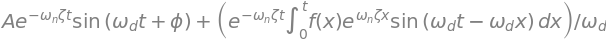

In [26]:
# Definição da forma geral da solução:
a = Symbol('A')
omgn = Symbol('\omega_n')
omgd = Symbol('\omega_d')
phi = Symbol('\phi')
f = Function('f')(x)
z = Symbol('\zeta')
t = Symbol('t')

# Resposta amortecida:
damped = (a*exp(-z*omgn*t)*sin((omgd*t)+phi))

# Método Heurístico para resolução da integral indefinida e teorema fundamental do cálculo:
def itg(fun, a, b):
    expression = heurisch(fun, x)
    return simplify(expression.subs(x, b) - expression.subs(x, a))

# Resposta forçada:
def forced(function=None):
    if(function==None):
        return ((1/omgd)*exp(-z*omgn*t)*integrate((f*exp(z*omgn*x)*sin(omgd*t-omgd*x)), (x, 0, t)))
    else:
        return ((1/omgd)*exp(-z*omgn*t)*itg((function*exp(z*omgn*x)*sin(omgd*t-omgd*x)), 0, t))
    
(damped+forced())

In [27]:
# Substituição das respectivas constantes em suas iterações:
RT = []
for i in range(len(omega_n)):
    ri = (damped+forced(PI[i])).subs([(a, A[i]), (omgn, omega_n[i]), (phi, PHI[i]), (omgd, omega_d[i]), (z, Z[i])]).doit()
    RT.append(trigsimp(arredNUM(ri))) # Simplificação trigonométrica

#RT = trigsimp(arredNUM(Matrix(RT).subs(G, freq))) # Correção de bug no método heurístico

RT = arredNUM(simplify(trigsimp(Matrix(RT).subs(G, freq))))

Matrix(RT)

⎡                                                      -12.7052⋅t             
⎢0.0576⋅sin(0.3142⋅t) - 0.0002⋅cos(0.3142⋅t) - 0.0003⋅ℯ          ⋅sin(53.7893⋅
⎢                                                                             
⎢                                                        -1.6948⋅t            
⎣  0.1577⋅sin(0.3142⋅t) - 0.0021⋅cos(0.3142⋅t) - 0.0053⋅ℯ         ⋅sin(8.7036⋅

             -12.7052⋅t               ⎤
t) + 0.0002⋅ℯ          ⋅cos(53.7893⋅t)⎥
                                      ⎥
             -1.6948⋅t                ⎥
t) + 0.0021⋅ℯ         ⋅cos(8.7036⋅t)  ⎦

### Tempos de acomodação (critério 2%): $$ST = \frac{4}{\zeta\omega_n}$$

In [28]:
ultim_time = 0
for i in range(len(omega_n)):
    if(Z[i]):
        current = (4/(Z[i]*omega_n[i]))
        if(current > ultim_time):
            ultim_time = np.ceil(current*1.5)
        print(f'ST{i+1} = {round(current, 2)} s')
    else:
        print(f'ST{i+1} = {np.Infinity}')

ST1 = 0.31 s
ST2 = 2.36 s


### Respostas desacopladas:

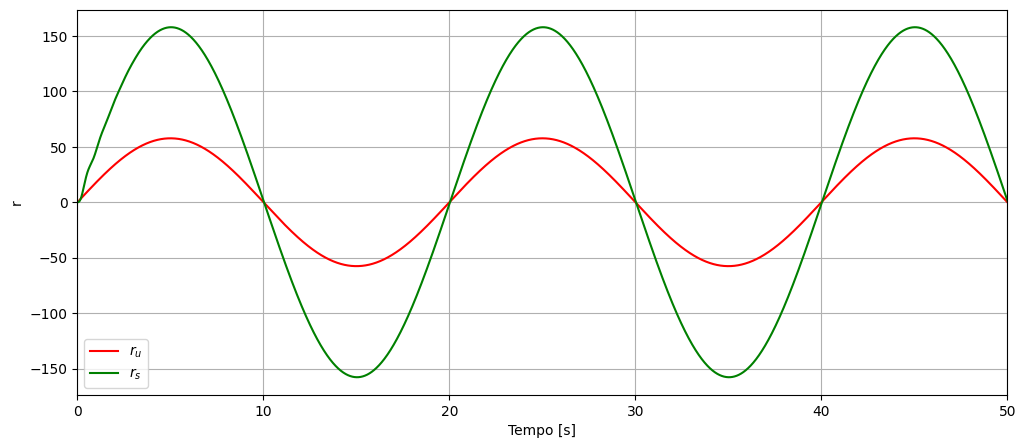

In [29]:
# Criando matriz de posição em função do tempo:
R = []
for i in RT:
    fx = lambdify(t, i, 'numpy')
    R.append(fx(time))

# Plotando os gráficos:
plt.rcParams['figure.figsize'] = (12, 5)
plt.figure(1)
labels = ['$r_u$', '$r_s$']
for i in range(len(R)):
    plt.plot(time, (R[i]*1e3), color[i%len(color)], label=labels[i])
plt.ylabel('r')
plt.legend()
plt.xlabel('Tempo [s]')
plt.title('')
plt.xlim(0, tf)
plt.grid()
plt.show()

### Retornando ao domínio físico:

In [30]:
XT = arredNUM(trigsimp(Matrix(S@RT)))

Matrix(XT)

⎡                                                      -12.7052⋅t             
⎢0.2503⋅sin(0.3142⋅t) - 0.0013⋅cos(0.3142⋅t) - 0.0011⋅ℯ          ⋅sin(53.7893⋅
⎢                                                                             
⎢                                                                             
⎣                                    0.2503⋅sin(0.3142⋅t) - 0.0034⋅cos(0.3142⋅

             -12.7052⋅t                          -1.6948⋅t                    
t) + 0.0007⋅ℯ          ⋅cos(53.7893⋅t) - 0.0014⋅ℯ         ⋅sin(8.7036⋅t) + 0.0
                                                                              
             -1.6948⋅t                         -1.6948⋅t                      
t) - 0.0086⋅ℯ         ⋅sin(8.7036⋅t) + 0.0034⋅ℯ         ⋅cos(8.7036⋅t)        

     -1.6948⋅t              ⎤
005⋅ℯ         ⋅cos(8.7036⋅t)⎥
                            ⎥
                            ⎥
                            ⎦

### Resposta temporal:

<Figure size 1200x500 with 0 Axes>

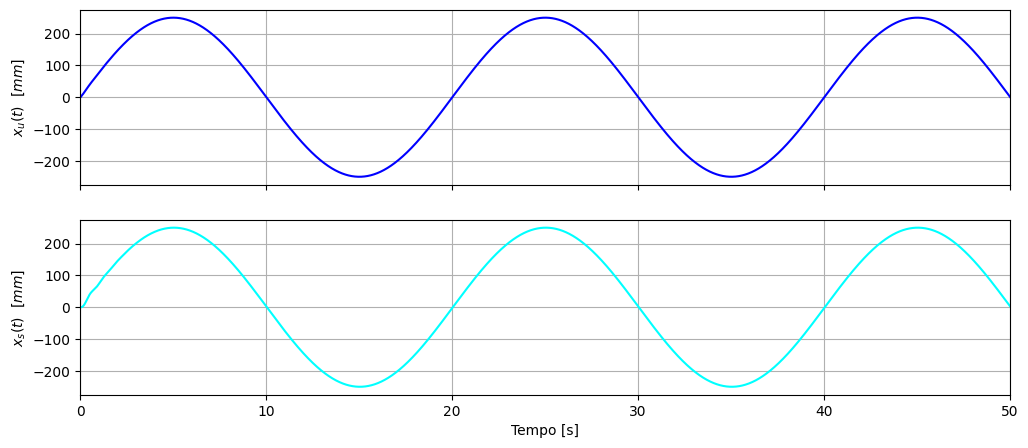

In [31]:
# Criando matriz de posição em função do tempo:
X = []
for i in XT:
    fx = lambdify(t, i, 'numpy')
    X.append(fx(time))

# Plotando os gráficos:
plt.rcParams['figure.figsize'] = (12, 5)
plt.figure(2)
plt.suptitle('')
plt.subplots(len(X), sharex=True)
labels = ['$x_u(t)~~[mm]$', '$x_s(t)~~[mm]$']
for i in range(len(X)):
    plt.subplot(len(X), 1, (i+1))
    plt.plot(time, (X[i]*1e3), color[(i+len(omega_n))%len(color)])
    plt.ylabel(labels[i])
    #plt.legend()
    plt.grid()
plt.xlim(0, tf)
plt.xlabel('Tempo [s]')
plt.show()


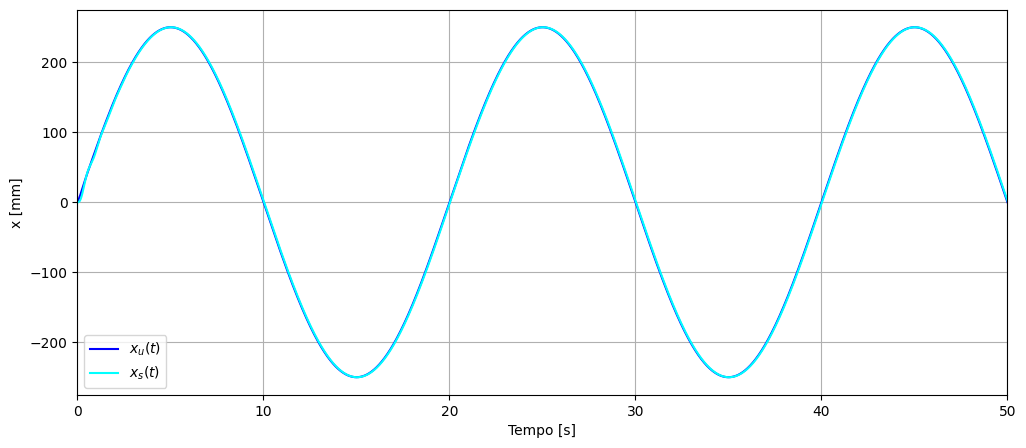

In [32]:
plt.rcParams['figure.figsize'] = (12, 5)
plt.figure(len(omega_n)+2)
labels = ['$x_u(t)$', '$x_s(t)$']
for i in range(len(X)):
    plt.plot(time, (X[i]*1e3), color[(i+(1*len(omega_n)))%len(color)], label=labels[i])
plt.ylabel('x [mm]')
plt.legend()
plt.xlabel('Tempo [s]')
plt.title('')
plt.xlim(0, tf)
plt.grid()
plt.show()

### Steady State:

In [33]:
XSS = XT
for a in preorder_traversal(XSS):
    if isinstance(a, type(exp(t))):
        XSS = XSS.subs(a, 0)

Matrix(XSS)

⎡0.2503⋅sin(0.3142⋅t) - 0.0013⋅cos(0.3142⋅t)⎤
⎢                                           ⎥
⎣0.2503⋅sin(0.3142⋅t) - 0.0034⋅cos(0.3142⋅t)⎦

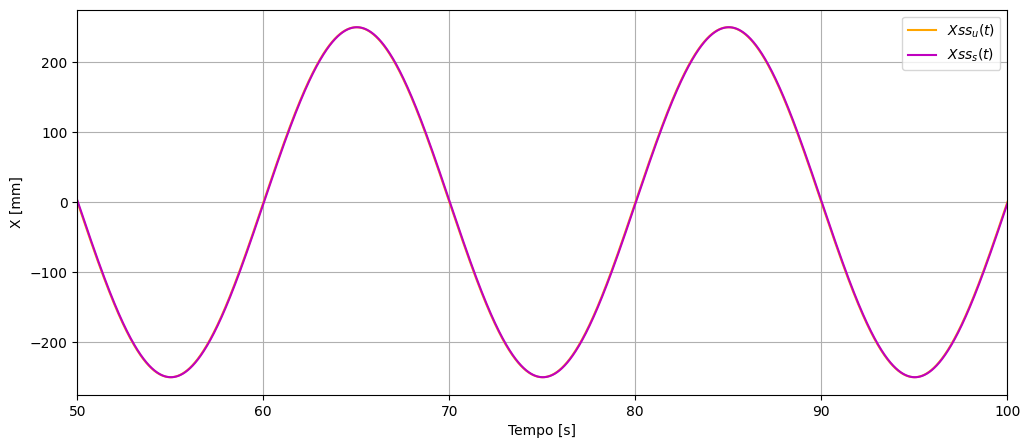

In [34]:
# Criando matriz de posição em função do tempo:

def const_function(time, cte):
    return ((time*0)+cte)

XSST = []
for i in XSS:
    fx = lambdify(t, i, 'numpy')
    css = fx(tf+time)
    if(isinstance(css, int)):
        for a in preorder_traversal(i):
            XSST.append(const_function(tf+time, a))
    else:
        XSST.append(css)

# Plotando os gráficos:
plt.rcParams['figure.figsize'] = (12, 5)
plt.figure(3)
labels = ['$Xss_u(t)$', '$Xss_s(t)$']
for i in range(len(XSST)):
    plt.plot((tf+time), (XSST[i]*1e3), color[(i+(2*len(omega_n)))%len(color)], label=labels[i])
plt.ylabel('X [mm]')
plt.legend()
plt.xlabel('Tempo [s]')
plt.title('')
plt.xlim(tf, (2*tf))
plt.grid()
plt.show()

### Frequências naturais, em Hertz:

In [35]:
for i in range(len(omega_n)):
    print(f'f{i+1} = {round((omega_n[i]/(2*np.pi)), 4)} Hz')

f1 = 8.7964 Hz
f2 = 1.4112 Hz


### Resposta em frequência:

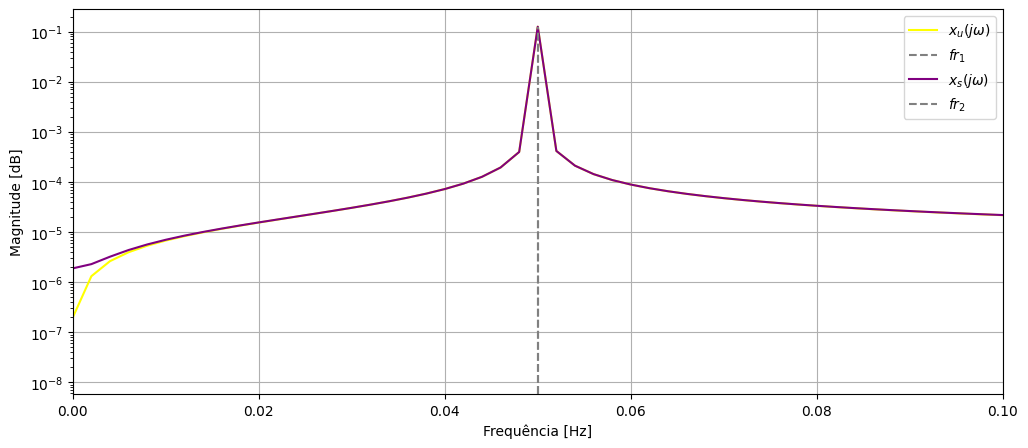

In [36]:
# Preparando as transformadas de Fourier:
def fft(sig, ts):
    fft = np.fft.fft(sig)

    N = len(sig)

    g = np.fft.fftfreq(N, ts)

    freqs = (g[:(N//2)]*(2*np.pi))
    amplitudes = (np.abs(fft)[:(N//2)]*(1/N))
    phase = np.rad2deg(np.angle(fft)[:(N//2)])

    return freqs, amplitudes, phase

ffts = []
for i in X:
    ffts.append(fft(i, ts))


# Frequências de ressonância
freqres = []
amp = []
for i in ffts:
    j = np.where(i[1]==np.max(i[1]))
    freqres.append(i[0][j][0])
    amp.append(i[1][j][0])

#Limite do eixo X, para ajuste:
xl = (np.max(freqres)/np.pi)

# Pltotando: Amplitude em função de frequência
plt.rcParams['figure.figsize'] = (12, 5)
plt.figure(4)
plt.semilogy()
labels = ['$x_u(j\omega)$', '$x_s(j\omega)$']
for i in range(len(ffts)):
    plt.plot((ffts[i][0]/(2*np.pi)), ffts[i][1], color[(i+(3*len(omega_n)))%len(color)], label=labels[i])
    plt.plot([(freqres[i]/(2*np.pi)), (freqres[i]/(2*np.pi))], [0, amp[i]], 'gray', linestyle='dashed', label=f'$fr_{i+1}$')
plt.ylabel('Magnitude [dB]')
plt.legend()
plt.xlabel('Frequência [Hz]')
plt.title('')
plt.xlim(0, xl)
plt.grid()
plt.show()

### Frequências de ressonância, em Hertz:

In [37]:
for i in range(len(freqres)):
    print(f'f{i+1} = {(freqres[i]/(2*np.pi)).round(4)} Hz')

f1 = 0.05 Hz
f2 = 0.05 Hz
